In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
books=pd.read_csv("Books.csv")
ratings=pd.read_csv("Ratings.csv")
users=pd.read_csv("Users.csv")

In [3]:
def df_statistics(df):
    print("\nShape:", df.shape)
    print("\nColumns:", df.columns)
    print("\nInformation:", df.info())
    print("\nNull values:", df.isna().sum().sum())
    print("\nDuplicate:", df.duplicated().sum())

    
    return df_statistics


In [4]:
df_statistics(books)


Shape: (271360, 8)

Columns: Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB

Information: None

Null values: 7

Duplicate: 0


<function __main__.df_statistics(df)>

In [5]:
df_statistics(ratings)


Shape: (1149780, 3)

Columns: Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB

Information: None

Null values: 0

Duplicate: 0


<function __main__.df_statistics(df)>

In [6]:
df_statistics(users)


Shape: (278858, 3)

Columns: Index(['User-ID', 'Location', 'Age'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB

Information: None

Null values: 110762

Duplicate: 0


<function __main__.df_statistics(df)>

## **Merging the dataset**

In [7]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
merged_data = pd.merge(books, ratings, on="ISBN", how="inner")
merged_data = pd.merge(merged_data, users, on="User-ID", how="inner")


In [11]:
merged_data.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
1023481,0373763530,Lone Star Knight (Texas Cattleman'S Club: Lone...,Cindy Gerard,2001,Silhouette,http://images.amazon.com/images/P/0373763530.0...,http://images.amazon.com/images/P/0373763530.0...,http://images.amazon.com/images/P/0373763530.0...,148446,5,"springwater, new york, usa",NaN
465776,0679601007,Crime and Punishment (Modern Library),Fyodor Dostoyevsky,1994,Modern Library,http://images.amazon.com/images/P/0679601007.0...,http://images.amazon.com/images/P/0679601007.0...,http://images.amazon.com/images/P/0679601007.0...,93565,8,"tustin, ,",72.0
751013,8432037311,Azteca/Aztec,Gary Jennings,1985,Planeta Pub Corp,http://images.amazon.com/images/P/8432037311.0...,http://images.amazon.com/images/P/8432037311.0...,http://images.amazon.com/images/P/8432037311.0...,3757,7,"madrid, madrid, spain",NaN
491523,0821773666,Annie's Rainbow (Zebra Contemporary Romance),Fern Michaels,2001,Zebra Books,http://images.amazon.com/images/P/0821773666.0...,http://images.amazon.com/images/P/0821773666.0...,http://images.amazon.com/images/P/0821773666.0...,252071,0,"catawba, wisconsin, usa",32.0
687853,0446601241,Kiss the Girls,James Patterson,1995,Warner Books,http://images.amazon.com/images/P/0446601241.0...,http://images.amazon.com/images/P/0446601241.0...,http://images.amazon.com/images/P/0446601241.0...,51207,10,"mountain city, tennessee, usa",35.0


In [12]:
df_statistics(merged_data)


Shape: (1031136, 12)

Columns: Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031134 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location           

<function __main__.df_statistics(df)>

In [13]:
merged_data.isna().sum()

ISBN                        0
Book-Title                  0
Book-Author                 2
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                     0
Book-Rating                 0
Location                    0
Age                    277835
dtype: int64

In [14]:
merged_data.dropna(inplace=True)

#Check on imputation as another option rather than droping the chunk

In [15]:
merged_data.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64

In [16]:
merged_data.shape

(753295, 12)

In [17]:
# merged_data = merged_data.rename_axis(index="new_index_name")
merged_data = merged_data.reset_index(drop=True)
merged_data.index = merged_data.index + 1


merged_data.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0
3,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,11400,9,"ottawa, ontario, canada",49.0
4,0151008116,Life of Pi,Yann Martel,2002,Harcourt,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,11400,6,"ottawa, ontario, canada",49.0
5,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,11400,0,"ottawa, ontario, canada",49.0


In [18]:
merged_data["Image-URL-L"][1]

'http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg'

In [19]:
merged_data.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

In [20]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753295 entries, 1 to 753295
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 753295 non-null  object 
 1   Book-Title           753295 non-null  object 
 2   Book-Author          753295 non-null  object 
 3   Year-Of-Publication  753295 non-null  object 
 4   Publisher            753295 non-null  object 
 5   Image-URL-S          753295 non-null  object 
 6   Image-URL-M          753295 non-null  object 
 7   Image-URL-L          753295 non-null  object 
 8   User-ID              753295 non-null  int64  
 9   Book-Rating          753295 non-null  int64  
 10  Location             753295 non-null  object 
 11  Age                  753295 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 69.0+ MB


In [21]:
merged_data.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
376879,0449221482,J Is for Judgment,Sue Grafton,1999,Fawcett Books,http://images.amazon.com/images/P/0449221482.0...,http://images.amazon.com/images/P/0449221482.0...,http://images.amazon.com/images/P/0449221482.0...,83287,10,"tulsa, oklahoma, usa",45.0
191892,0440900506,Against the Storm,Gaye Hicyilmaz,1993,Dell Publishing,http://images.amazon.com/images/P/0440900506.0...,http://images.amazon.com/images/P/0440900506.0...,http://images.amazon.com/images/P/0440900506.0...,85701,0,"savannah, georgia, usa",37.0
11103,0393308804,Wide Sargasso Sea (Norton Paperback Fiction),Jean Rhys,1996,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393308804.0...,http://images.amazon.com/images/P/0393308804.0...,http://images.amazon.com/images/P/0393308804.0...,230522,0,"colorado springs, colorado, usa",52.0
623233,0060956135,The Cloud Sketcher: A Novel,Richard Rayner,2002,Perennial,http://images.amazon.com/images/P/0060956135.0...,http://images.amazon.com/images/P/0060956135.0...,http://images.amazon.com/images/P/0060956135.0...,184195,0,"coventry, connecticut, usa",46.0
383318,0440214041,The Pelican Brief,John Grisham,1993,Dell,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...,69697,0,"west sacramento, california, usa",24.0


In [22]:
# Droping the url_columns
merged_data.drop(columns=["Image-URL-S", "Image-URL-M"], inplace=True)

In [23]:
merged_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0
3,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,11400,9,"ottawa, ontario, canada",49.0
4,0151008116,Life of Pi,Yann Martel,2002,Harcourt,http://images.amazon.com/images/P/0151008116.0...,11400,6,"ottawa, ontario, canada",49.0
5,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,11400,0,"ottawa, ontario, canada",49.0


## **Exploratory Data Analysis**

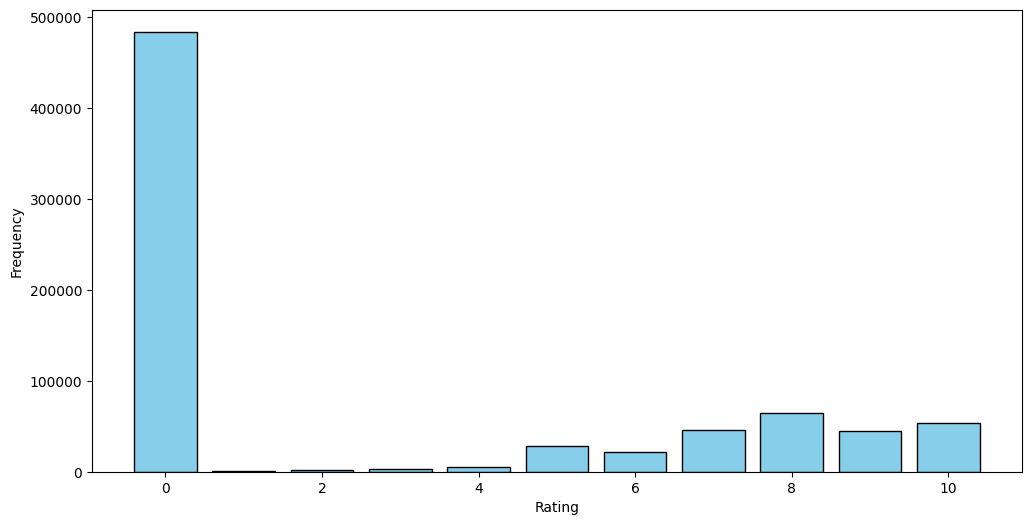

In [24]:
# Plot the distribution of book ratings
plt.figure(figsize=(12, 6))
plt.bar(merged_data["Book-Rating"].value_counts().index, merged_data["Book-Rating"].value_counts(), edgecolor='black', color='skyblue')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()



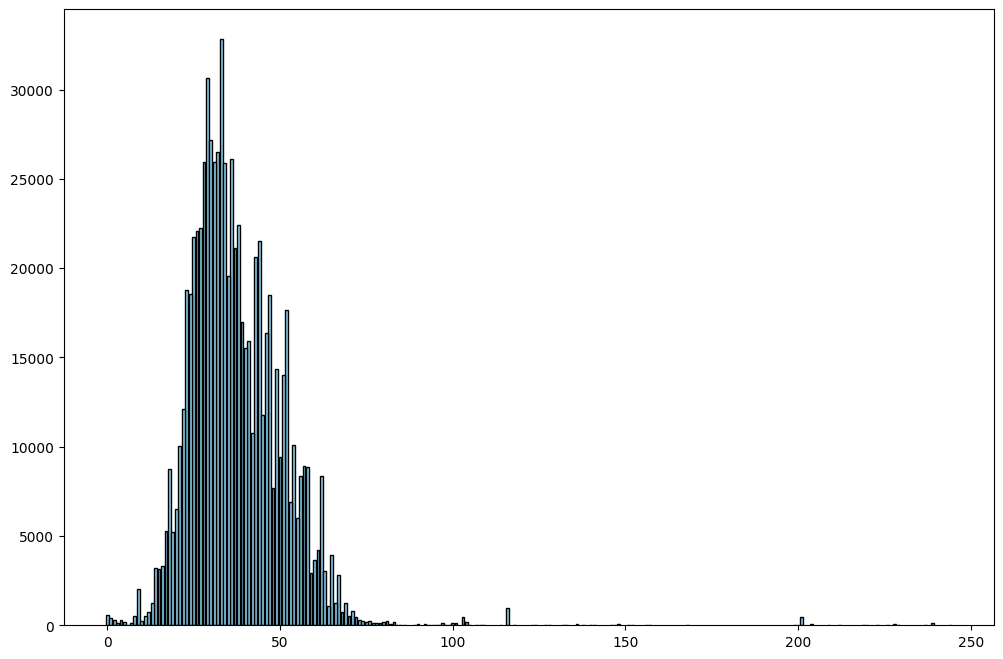

In [25]:
# Plot the distribution of age ratings
plt.figure(figsize=(12, 8))
plt.bar(merged_data["Age"].value_counts().index, 
        merged_data["Age"].value_counts(), edgecolor='black', color='skyblue' )
plt.show()

In [26]:
merged_data["Year-Of-Publication"].unique()

array([2002, 2001, 2003, 1998, 1993, 1999, 1992, 2000, 1989, 1996, 1988,
       1976, 1985, 1991, 1980, 2004, 1995, 1997, 1994, 0, 1986, 1990,
       1987, 1984, 1983, 1938, 1974, 1981, 1951, '2002', '1999', '1996',
       '2003', '2004', '1997', '1984', '1988', '1990', '2001', '1991',
       '1993', '1994', '1998', '2000', '0', '1995', '1985', '1977',
       '1989', '1975', '1983', 1977, 1925, 1971, 1970, 1973, 1967, 1982,
       1969, 1979, 1963, 1953, 1978, 1956, '1964', '1981', '1976', '1992',
       '1978', '1987', '1986', 1965, 1972, 1901, 1964, 2030, 1927, 1975,
       1923, 1954, 1958, 1955, 1966, 1926, 1968, 1961, 1940, 1959, '1979',
       '1941', '1982', '1959', '1980', '1972', '1970', '1942', '1974',
       '1966', '1963', '1973', '1962', '1922', '1969', '1957', '1897',
       '1971', '1958', '1968', '1960', '1949', '1967', '1956', '1939',
       '1955', '1961', '1952', '1933', '1954', '1965', '1944', 1962, 1952,
       1957, 1948, 2011, 1960, '1951', 1902, 1920, '1920', 19

In [27]:
authors_with_most_books = pd.DataFrame(merged_data["Book-Author"].value_counts()[0:20]).reset_index()
authors_with_most_books.columns = ["Book-Author", "Book-Title"]

In [28]:
authors_with_most_books

,Book-Author,Book-Title
0,Stephen King,7664
1,Nora Roberts,6407
2,John Grisham,4168
3,James Patterson,4096
4,Mary Higgins Clark,3372
5,Dean R. Koontz,3256
6,Danielle Steel,2761
7,Tom Clancy,2753
8,Sue Grafton,2446
9,Anne Rice,2398


<Axes: xlabel='Age'>

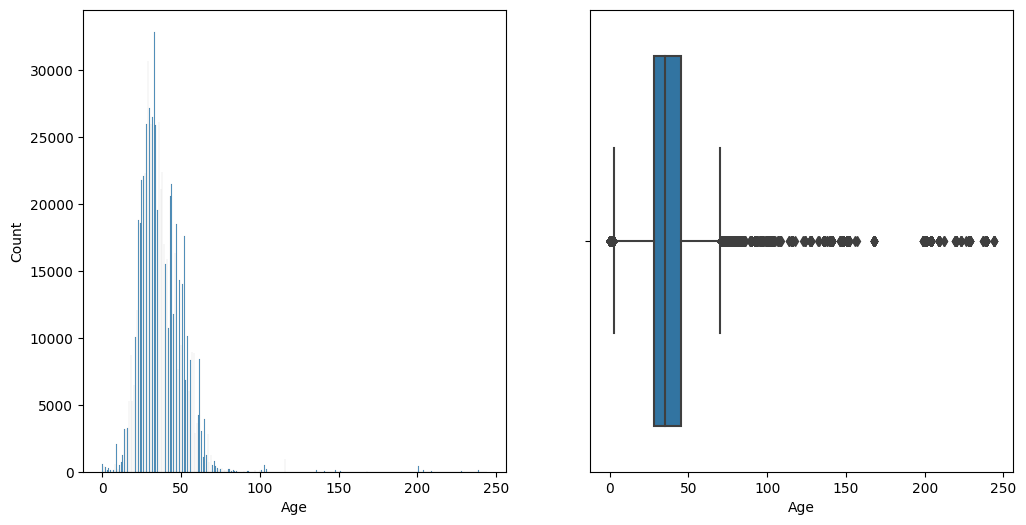

In [29]:
#Histogram showing distribution of ages
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=merged_data)

#boxplot of Age column
plt.subplot(1,2,2)
sns.boxplot(x='Age',data=merged_data)
     

In [30]:
# Age groups
def age_group(age):
  ''' 
  defines the age group of users
  '''
  if age<13:
    x='Children'
  elif age>=13 and age<18:
    x='Teens'
  elif age>=18 and age<36:
    x='Youth'
  elif age>=36 and age<56:
    x='Middle aged adults'
  else:
    x='Elderly'
  return x

In [31]:
#Applying the function
merged_data['Age_group']=merged_data['Age'].apply(lambda x: age_group(x))

In [32]:
merged_data.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age,Age_group
726090,051510566X,The Cat Who Lived High,Lilian Jackson Braun,1991,Jove Books,http://images.amazon.com/images/P/051510566X.0...,127535,8,"little rock, arkansas, usa",33.0,Youth
410543,006016848X,"Men Are from Mars, Women Are from Venus: A Pra...",John Gray,1992,HarperCollins Publishers,http://images.amazon.com/images/P/006016848X.0...,201783,0,"white haven, pennsylvania, usa",25.0,Youth
251721,0836221311,Last Chapter and Worse,Gary Larson,1996,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836221311.0...,196160,0,"auburn, alabama, usa",22.0,Youth
556169,0312995423,Digital Fortress : A Thriller,Dan Brown,2003,St. Martin's Press,http://images.amazon.com/images/P/0312995423.0...,133235,8,"addison, texas, usa",33.0,Youth
549999,0060915544,The Bean Trees,Barbara Kingsolver,1989,Perennial,http://images.amazon.com/images/P/0060915544.0...,106895,0,"indianapolis, indiana, usa",29.0,Youth


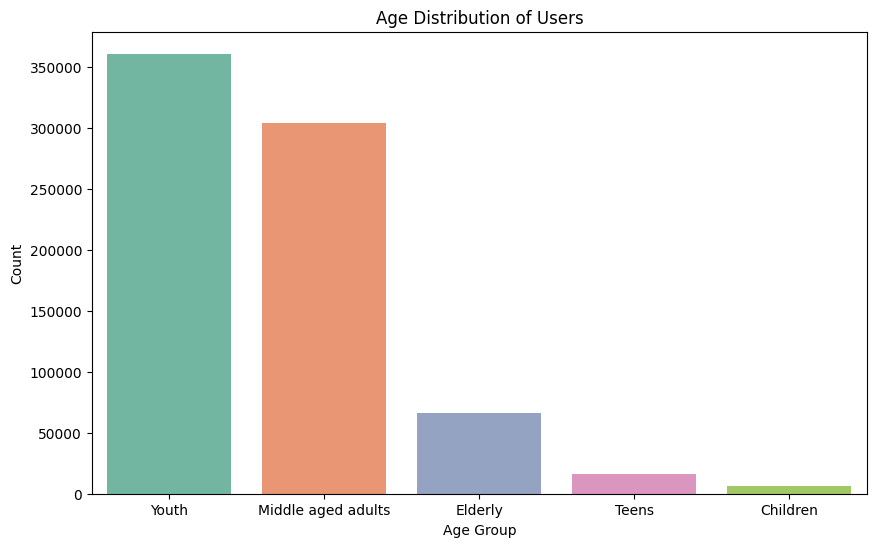

In [33]:
# Checking on age group distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Age_group', palette='Set2')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Age Distribution of Users")
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'toronto, ontario, canada'),
  Text(1, 0, 'london, england, united kingdom'),
  Text(2, 0, 'chicago, illinois, usa'),
  Text(3, 0, 'seattle, washington, usa'),
  Text(4, 0, 'portland, oregon, usa'),
  Text(5, 0, 'sydney, new south wales, australia'),
  Text(6, 0, 'san francisco, california, usa'),
  Text(7, 0, 'ottawa, ontario, canada'),
  Text(8, 0, 'new york, new york, usa'),
  Text(9, 0, 'vancouver, british columbia, canada'),
  Text(10, 0, 'austin, texas, usa'),
  Text(11, 0, 'melbourne, victoria, australia'),
  Text(12, 0, 'san diego, california, usa'),
  Text(13, 0, 'houston, texas, usa'),
  Text(14, 0, 'calgary, alberta, canada'),
  Text(15, 0, 'berlin, berlin, germany'),
  Text(16, 0, 'madrid, madrid, spain'),
  Text(17, 0, 'los angeles, california, usa'),
  Text(18, 0, 'hamburg, hamburg, germany'),
  Text(19, 0, 'minneapolis, minnesota, usa')])

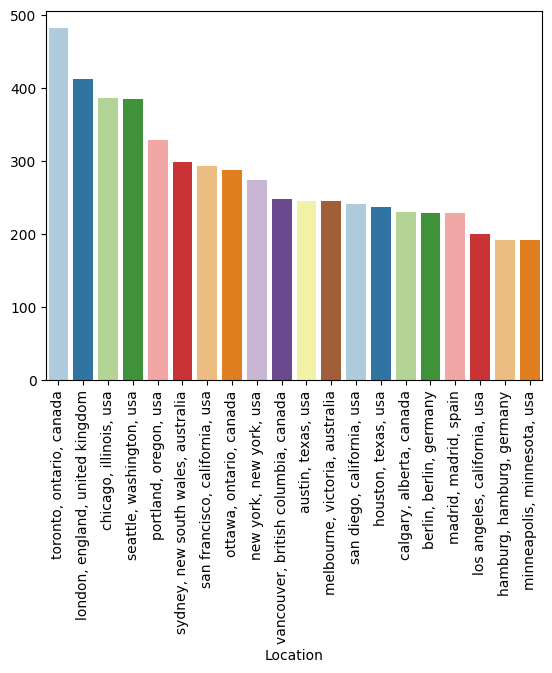

In [34]:
#Countries with maximum number of users
top10=merged_data.groupby('Location')['User-ID'].nunique().nlargest(20)
sns.barplot(x=top10.index,y=top10.values,palette='Paired')
plt.xticks(rotation=90)

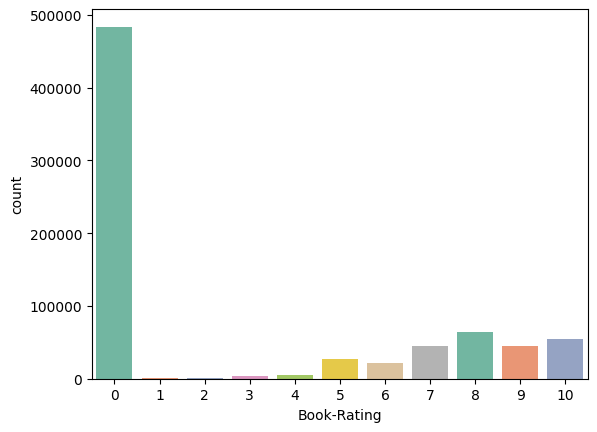

In [35]:
#Rating distribution for explicit rating
sns.countplot(x='Book-Rating',data=merged_data,palette='Set2');

### **Bivariate Analysis**

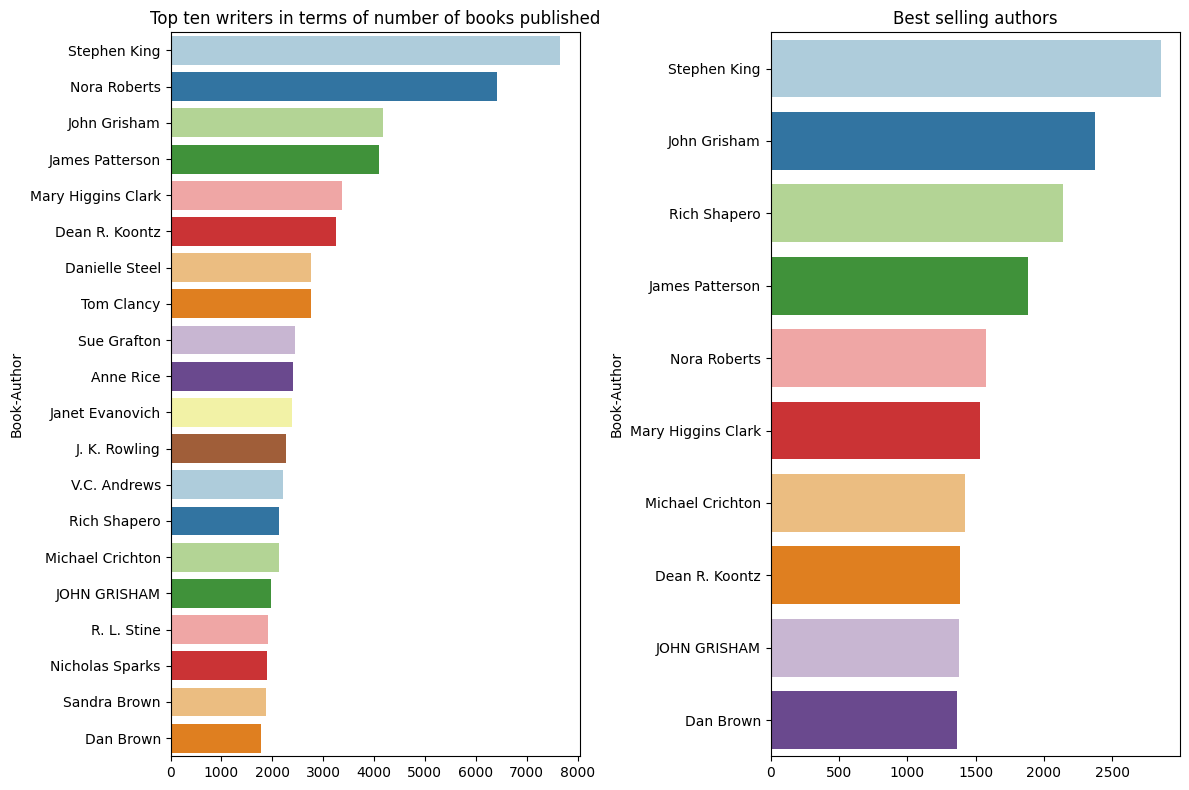

In [36]:
# Top 10 authors in terms of number of books and best selling authors

fig=plt.figure(figsize=(12,8))
#Authored the most number of  books 
plt.subplot(1,2,1)
popular_authors=merged_data.groupby('Book-Author')['Book-Title'].count().nlargest(20)
sns.barplot(x=popular_authors.values,y=popular_authors.index,palette='Paired')
plt.title('Top ten writers in terms of number of books published')

#Best selling authors
plt.subplot(1,2,2)
best_selling_authors=merged_data.groupby('Book-Author')['User-ID'].nunique().nlargest(10)
sns.barplot(x=best_selling_authors.values,y=best_selling_authors.index,palette='Paired')
plt.title('Best selling authors')
plt.tight_layout()

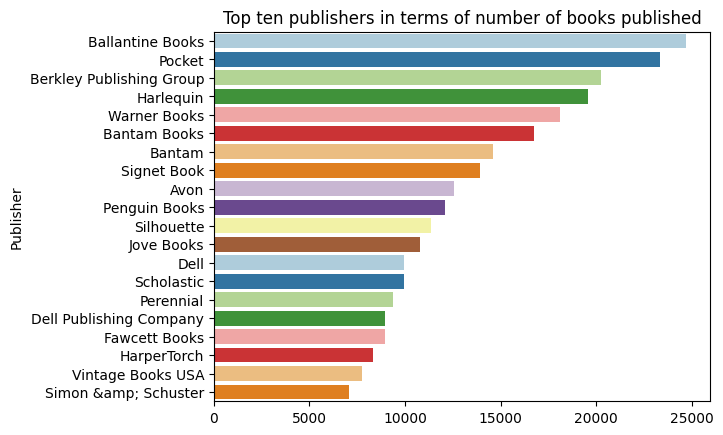

In [37]:
#Companies with the most number of books published
popular_publishers=merged_data.groupby('Publisher')['Book-Title'].count().nlargest(20)
sns.barplot(x=popular_publishers.values,y=popular_publishers.index,palette='Paired')
plt.title('Top ten publishers in terms of number of books published');

In [38]:
merged_data["Age_group"].unique()

array(['Youth', 'Middle aged adults', 'Elderly', 'Teens', 'Children'],
      dtype=object)

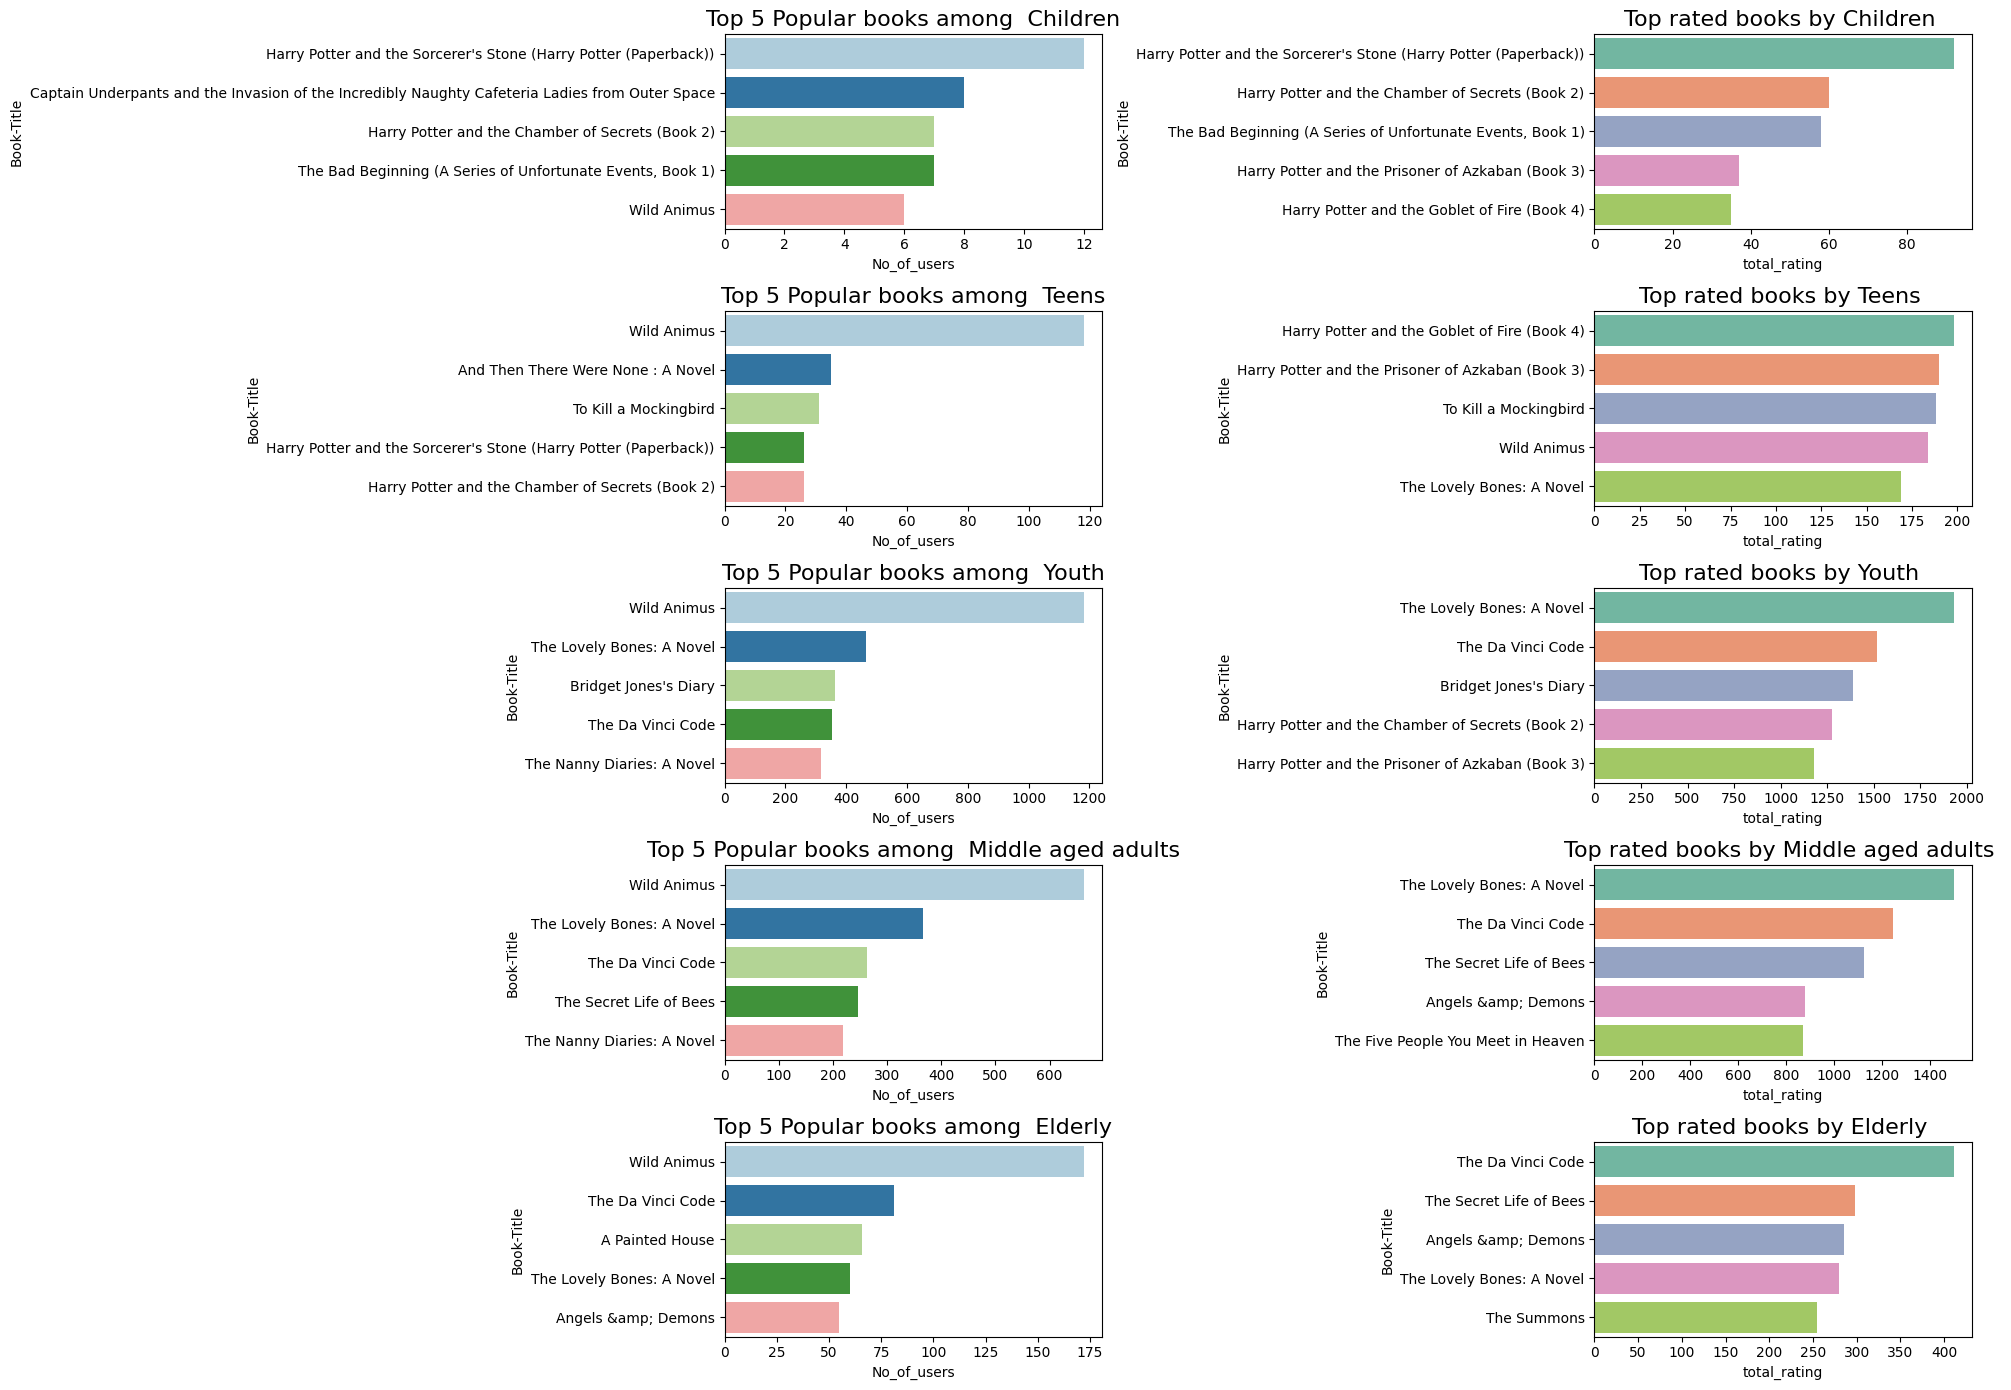

In [39]:
#Age group against the book title
fig=plt.figure(figsize=(20,14))
i=1
for group  in ['Children','Teens','Youth','Middle aged adults','Elderly']:
  age_df=merged_data.loc[merged_data['Age_group']==group].groupby(['Book-Title']).agg(No_of_users=('User-ID','nunique'),total_rating=('Book-Rating','sum')).reset_index() 
  plt.subplot(5,2,i)
  age_df.sort_values(by='No_of_users',ascending=False,inplace=True)
  sns.barplot(x='No_of_users',y='Book-Title',palette='Paired',data=age_df.head(5))
  plt.title('Top 5 Popular books among  {}'.format(group),size=16)
  i+=1
  plt.subplot(5,2,i)
  age_df.sort_values(by='total_rating',ascending=False,inplace=True)
  sns.barplot(x='total_rating',y='Book-Title',palette='Set2',data=age_df.head(5))
  plt.title('Top rated books by {} '.format(group),size=16)
  i+=1
  
plt.tight_layout()

In [40]:

explicit_rating = merged_data[merged_data['Book-Rating'] != 0]
implicit_rating = merged_data[merged_data['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (269616, 11) and implicit rating: (483679, 11)


In [41]:
# most purchased books including the implicitely rated books
merged_data.groupby('ISBN')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending=False)[:10]['ISBN'].values

array(['0971880107', '0316666343', '0385504209', '0060928336',
       '0671027360', '0312195516', '0142001740', '059035342X',
       '0446672211', '0345337662'], dtype=object)

In [42]:

# getting the book names corresponding to these ISBNs
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211']
merged_data[merged_data['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age,Age_group
6,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,11400,7,"ottawa, ontario, canada",49.0,Middle aged adults
82,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,85526,0,"victoria, british columbia, canada",36.0,Middle aged adults
86,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,85526,8,"victoria, british columbia, canada",36.0,Middle aged adults
409,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,96054,0,"ottawa, ontario, canada",29.0,Youth
416,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,96054,0,"ottawa, ontario, canada",29.0,Youth
...,...,...,...,...,...,...,...,...,...,...,...
654478,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,260621,0,"chicago, illinois, usa",48.0,Middle aged adults
654482,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,262843,0,"oceanside, california, usa",57.0,Elderly
654485,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,267596,5,"williamstown, massachusetts, usa",46.0,Middle aged adults
654508,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,269105,8,"petaluma, california, usa",64.0,Elderly


## **Weighted average rating method**

* **we give more consideration to the ratings of similar users in order of their similarity**
* **user to user**

**Using Weighted average for each Book’s Average Rating**

**W = Rv + Cm/(v + m)**

**where**

**W= Weighted Rating**

**R = Average of the Books rating**

**v = No of people who have rated the books(number of votes)**

**m = minimum no of votes to be listed**

**C = the mean rating across all the books***

In [43]:
#finding the average rating and number of votes received by books
df_relevant_data = merged_data.groupby(['Book-Title','Book-Author'],as_index=False).agg(avg_rating=('Book-Rating','mean'),ratings_count=('Book-Rating','count'))
v=df_relevant_data['ratings_count']
R=df_relevant_data['avg_rating']
C=df_relevant_data['avg_rating'].mean()
m=int(df_relevant_data['ratings_count'].quantile(0.90))#minimum number of votes to be listed
print(f'The average rating of all the books is {C} and the minimum number of votes required by the books to be listed is {m}  ')

The average rating of all the books is 2.8204684840712453 and the minimum number of votes required by the books to be listed is 6  


In [44]:
#Calculating weighted average rating of the books
df_relevant_data['weighted_average']=round(((R*v)+ (C*m))/(v+m),2)

In [45]:
df_relevant_data.sort_values(by='weighted_average',ascending=False).head(20)

,Book-Title,Book-Author,avg_rating,ratings_count,weighted_average
62169,Free,Paul Vincent,8.115385,52,7.57
51688,El Hobbit,J. R. R. Tolkien,8.000000,25,7.00
30617,Chobits (Chobits),Clamp,7.923077,26,6.97
157356,The Blue Day Book: A Lesson in Cheering Yourse...,Bradley Trevor Greive,9.333333,9,6.73
129450,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,8.818182,11,6.70
173029,The Lorax,Dr. Seuss,8.900000,10,6.62
177382,The Outlandish Companion,DIANA GABALDON,9.375000,8,6.57
41743,Death: The High Cost of Living,Neil Gaiman,9.375000,8,6.57
155667,The Baby Book: Everything You Need to Know Abo...,Martha Sears,9.000000,9,6.53
70884,Harry Potter Und Der Feuerkelch,Joanne K. Rowling,8.700000,10,6.50


In [46]:
filtered_df=df_relevant_data[df_relevant_data['ratings_count'] > 50]

filtered_df
# df_relevant_data.columns

,Book-Title,Book-Author,avg_rating,ratings_count,weighted_average
619,16 Lighthouse Road,Debbie Macomber,1.981481,54,2.07
669,1984,George Orwell,4.633621,232,4.59
710,1st to Die: A Novel,James Patterson,3.560241,332,3.55
826,2010: Odyssey Two,Arthur C. Clarke,2.612903,62,2.63
836,204 Rosewood Lane,Debbie Macomber,1.607143,56,1.72
...,...,...,...,...,...
211111,You Belong To Me,Mary Higgins Clark,2.329268,82,2.36
211967,Zen and the Art of Motorcycle Maintenance: An ...,ROBERT PIRSIG,2.944000,125,2.94
212192,Zoya,Danielle Steel,1.389610,77,1.49
212356,"\O\"" Is for Outlaw""",SUE GRAFTON,2.517857,112,2.53


In [47]:
filtered_df["Book-Title"][619]

'16 Lighthouse Road'

In [48]:
filtered_df["Book-Title"][836]

'204 Rosewood Lane'

## **Collaborative filtering**

Collaborative filtering techniques create a model based on past user activity (items previously purchased, movies viewed and rated, etc.) as well as usage choices made by both current and past users. Then, this model is used to predict the ratings for items or items themselves that the user might be interested in.

Creating a function that will;

* Extracts the author of the input book from the DataFrame.
* Filters the DataFrame to get books from the same author, sorted by 'weighted_average'.
* Prints information about the author and the recommendation process.
* Selects the top recommended books from the same author, excluding the input book.
* Returns a DataFrame containing the recommended books and their weighted averages.

In [49]:
def author_based(book_title,number,df_relevant_data=df_relevant_data):
  '''
  To recommend books from the same author as the book entered by the user
  '''
  author=df_relevant_data.loc[df_relevant_data['Book-Title']==book_title]['Book-Author'].unique()[0]
    
  author_df=df_relevant_data.loc[(df_relevant_data['Book-Author']==author)].sort_values(by='weighted_average',ascending=False)

  print(f'The author of the book {book_title} is {author}\n')
  print(f'Here are the top {number} books from the same author\n')

  top_rec=author_df.loc[(author_df['Book-Title']!=book_title),['Book-Title','weighted_average']].head(number)
  return(top_rec)

In [50]:
#get book name and number of books to recommend

book_title = '16 Lighthouse Road'
number =5

author_based(book_title,number)

# top_recommendations from the same author

The author of the book 16 Lighthouse Road is Debbie Macomber

Here are the top 5 books from the same author



,Book-Title,weighted_average
29389,Changing Habits,4.93
118290,One Night,3.99
140759,Shirley Goodness And Mercy (Hardcover),3.77
127178,"Promise, Texas",3.70
178576,The Playboy and the Widow (Thorndike Large Pri...,3.56


### **Content Based Filtering**

* We are going to build two recommendation engines using the book title and description.

* Convert each book title and description into vectors using TF-IDF and bigram. For more details on TF-IDF
  We are building two recommendation engines, one with a book title and another one with a book description. 
* The model recommends a similar book based on title and description.
* Calculate the similarity between all the books using cosine similarity.
* Define a function that takes book title and genre as an input and returns the top five similar recommended books based on the   title and description.

In [51]:
merged_data.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age,Age_group
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,Youth
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0,Middle aged adults


In [52]:
merged_data.rename(columns={
    "Book-Title": "Title",
    "Book-Author": "Author",
    "Year-Of-Publication": "Year",
    "Image-URL-L": "URL",
    "Book-Rating": "Rating",
    "User-ID": "UserID"
}, inplace=True)


In [53]:
merged_data.head(2)

,ISBN,Title,Author,Year,Publisher,URL,UserID,Rating,Location,Age,Age_group
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,Youth
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0,Middle aged adults


In [54]:
merged_data["Author"][1]

'Mark P. O. Morford'

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd
from scipy.sparse import csr_matrix

# Assuming your data is stored in a DataFrame named 'merged_data'
# Replace 'books_data' with the actual name of your DataFrame

# Function for recommending books based on Book title and author.
def recommend(title, author, merged_data):
    # Combine relevant features into a single column for content-based filtering
    merged_data['combined_features'] = merged_data['Title'] + ' ' + merged_data['Author'] + ' ' + merged_data['Year'].astype(str)

    # Convert the combined features into vectors
    tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, stop_words='english', max_features=0.01)

    # Use a sparse matrix representation to reduce memory usage
    tfidf_matrix = csr_matrix(tfidf_vectorizer.fit_transform(merged_data['combined_features']))

    # Calculate the cosine similarity between books
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Get the index corresponding to the given book title and author
    idx = merged_data[(merged_data['Title'] == title) & (merged_data['Author'] == author)].index[0]

    # Get the pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 5 similar books
    sim_books_indices = [i[0] for i in sim_scores[1:6]]

    # Top 5 book recommendations
    recommendations = merged_data.iloc[sim_books_indices][['Title', 'Author', 'Year']]

    return recommendations


In [57]:
# # Example usage:
# Title = "Classical Mythology"
# Author = "Mark P. O. Morford"
# recommendations = recommend(Title,Author, merged_data)
# print(recommendations)


## **Singular value decomposition**

* The goal of using SVD to factorize a user-item matrix is to find two new matrices, one representing users and the other         representing items, that when multiplied together, approximate the original matrix as closely as possible. These new matrices   are called latent representations, and they contain important information about the users and items that can be used to make   recommendations.

* Decompose the user-item matrix into three matrices: U, S, and V.
* Keep only the top k singular values and their corresponding vectors, this is useful in order to reduce the complexity and       computational costs without losing too much information.
* Multiply the matrices back together to obtain an approximation of the original user-item matrix.

* SVD is a powerful technique used in recommender systems to make personalized recommendations to users. By breaking down the     user-item matrix into its core components, SVD allows us to find latent representations of users and items, which can then be   used to make recommendations in various ways, such as finding similar users or items, and predicting how a user would rate an   unseen item. SVD is also useful in handling missing data, which is a common problem in recommender systems. With its ability   to reduce dimensionality, it’s a great technique for large-scale recommendation systems.

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import random
import math

In [71]:
#Filtering books with more than 5 reviews and creating new dataframe.

print('The number of books that are explicitely rated are',explicit_rating['ISBN'].nunique())

ratings_count_df=explicit_rating.groupby("ISBN")['User-ID'].count().to_frame('No-of-rated-users').reset_index()

selected_books =list(ratings_count_df.loc[ratings_count_df['No-of-rated-users']>5,'ISBN'].unique())

print('Number of  books rated by atleast 5 users:',len(selected_books))

filter_df=explicit_rating.loc[explicit_rating['ISBN'].isin(selected_books)]

The number of books that are explicitely rated are 119943
Number of  books rated by atleast 5 users: 7187


In [72]:
#keeping books with selected users
print('The number of users who have explicitely rated books are',explicit_rating['User-ID'].nunique())

#keeps Users who have rated more than five books

books_count_df=filter_df.groupby("User-ID")['ISBN'].count().to_frame('No-of-books-rated').reset_index()

selected_users = list(books_count_df.loc[books_count_df['No-of-books-rated']>5,'User-ID'].unique())

print('Number of  users who have rated atleast 5 books are :',len(selected_users))

#dataframe with filtered number of interactions
filter_df=filter_df.loc[filter_df['User-ID'].isin(selected_users)]

print('The shape of data fame with filtered number of interactions : ',filter_df.shape)

The number of users who have explicitely rated books are 40543
Number of  users who have rated atleast 5 books are : 3831
The shape of data fame with filtered number of interactions :  (71093, 11)


In [73]:
new_df = filter_df.copy()

In [88]:
# Understanding the description of the data
new_df['Book-Rating'].describe()

count    71093.000000
mean         3.127517
std          0.332584
min          1.000000
25%          3.000000
50%          3.169925
75%          3.321928
max          3.459432
Name: Book-Rating, dtype: float64

In [75]:
def smooth_user_preference(x):
    '''Function to smooth column'''
    return math.log(1+x, 2) #log to base 2
#applying function
new_df['Book-Rating']= new_df['Book-Rating'].apply(smooth_user_preference)
new_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Location,Age,Age_group
3,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,11400,3.321928,"ottawa, ontario, canada",49.0,Middle aged adults
4,0151008116,Life of Pi,Yann Martel,2002,Harcourt,http://images.amazon.com/images/P/0151008116.0...,11400,2.807355,"ottawa, ontario, canada",49.0,Middle aged adults
6,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,11400,3.000000,"ottawa, ontario, canada",49.0,Middle aged adults
8,0316789089,The Pilot's Wife : A Novel Tag: Author of the ...,Anita Shreve,1999,"Little, Brown",http://images.amazon.com/images/P/0316789089.0...,11400,3.000000,"ottawa, ontario, canada",49.0,Middle aged adults
11,0743418174,Good in Bed,Jennifer Weiner,2002,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...,11400,3.169925,"ottawa, ontario, canada",49.0,Middle aged adults


In [89]:
#Splitting the dataset
train_df, test_df = train_test_split(new_df,stratify=new_df['User-ID'],test_size=0.15,random_state=0)

print('# interactions on Train set: %d' % len(train_df))
print('# interactions on Test set: %d' % len(test_df))

# interactions on Train set: 60429
# interactions on Test set: 10664


In [90]:
#Creating a sparse pivot table with users in rows and ISBN number of books in columns
users_books_pivot_matrix_df = train_df.pivot(index='User-ID',columns='ISBN',values='Book-Rating').fillna(0)

users_books_pivot_matrix_df.head()

ISBN,0002251760,0002558122,000649840X,0006547834,0006550576,0006550789,0006551971,0006742939,0007110928,0007122039,...,8495501112,8495501198,849550152X,8495618605,880781210X,8817106259,8817131628,8845915611,950491036X,9726101794
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
#Creating a matrix with the values of users_books_pivot_matrix_df
original_ratings_matrix = users_books_pivot_matrix_df.values
original_ratings_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
#Storing the User-IDs in a list
user_ids = list(users_books_pivot_matrix_df.index)
user_ids[:10]

[254, 388, 503, 505, 638, 643, 651, 709, 805, 882]

In [96]:
# Matrix factorization for collaborative filtering

# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 20

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(original_ratings_matrix, k = NUMBER_OF_FACTORS_MF)

* svds(): This function is likely from a library such as SciPy, and it performs the Singular Value Decomposition (SVD) on the     original user-item matrix. SVD is a technique for matrix factorization.

* U: Represents the user matrix, where each row corresponds to a user and each column corresponds to a latent factor.
* sigma: Represents a diagonal matrix of singular values.
* Vt: Represents the transpose of the item matrix, where each row corresponds to a latent factor and each column corresponds to   an item.

In [97]:
#converting sigma to a diagonal matrix
sigma = np.diag(sigma)

In [98]:
#Rating matric reconstructed using the matrices obtained after factorizing
predicted_ratings_matrix = np.dot(np.dot(U, sigma), Vt) 
predicted_ratings_matrix 

array([[ 3.25154051e-02, -1.35076983e-04,  3.48369793e-03, ...,
        -5.89727070e-04,  3.05437239e-02,  3.48426464e-03],
       [ 1.19405668e-03,  1.98040000e-04,  7.14161497e-04, ...,
         3.01617128e-04,  9.42779040e-05,  5.44601683e-04],
       [ 2.09713146e-03,  6.92075494e-05,  1.21010244e-03, ...,
        -1.44151901e-05,  4.72469857e-03,  5.77840950e-04],
       ...,
       [ 5.21249850e-03,  5.74473192e-04,  1.05236355e-03, ...,
         2.58454782e-04, -4.70932815e-03, -8.29869463e-04],
       [ 3.08105379e-03, -1.34122993e-04,  7.82878218e-04, ...,
         4.51280003e-05, -7.40105075e-05,  7.51557582e-05],
       [-3.60955464e-04,  3.20934194e-04,  1.42515714e-03, ...,
         2.52856516e-04, -7.51397335e-04,  7.17957293e-04]])

In [100]:
#Converting the reconstructed matrix back to a Pandas dataframe
predicted_ratings_df = pd.DataFrame(predicted_ratings_matrix , columns = users_books_pivot_matrix_df.columns, index=user_ids).transpose()
predicted_ratings_df.head()

,254,388,503,505,638,643,651,709,805,882,...,277937,278007,278026,278137,278188,278221,278356,278390,278554,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
0002251760,0.032515,0.001194,0.002097,0.003878,0.007407,0.002353,-0.002216,0.003595,0.024078,0.016852,...,0.006598,0.004249,0.000600,0.015625,0.018895,0.001955,-0.038744,0.005212,0.003081,-0.000361
0002558122,-0.000135,0.000198,0.000069,0.000023,-0.001449,0.000059,-0.000036,0.000050,0.001284,0.000546,...,0.000265,0.000192,-0.000116,0.000428,0.000255,0.000102,-0.000465,0.000574,-0.000134,0.000321
000649840X,0.003484,0.000714,0.001210,-0.002117,0.020260,0.000193,0.000751,0.000084,0.006079,0.001692,...,0.000889,0.000490,0.002906,-0.001472,0.000439,0.001664,0.003391,0.001052,0.000783,0.001425
0006547834,0.000804,0.000345,-0.000425,-0.001744,0.014438,0.000467,-0.000219,0.000186,0.004706,0.001136,...,0.001973,0.001118,0.000686,-0.001231,0.001145,0.001058,-0.003288,0.004396,0.001233,0.000241
0006550576,0.002399,0.000597,-0.000064,0.001936,0.003878,0.000270,-0.000410,-0.000044,0.004279,0.001649,...,0.001139,0.000896,-0.000240,0.003897,0.000656,0.000562,-0.004783,0.000543,0.000120,0.001090


In [124]:
class CFRecommender:
    #Storing model name
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        #Creating attributes
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        '''This will return model name'''
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'Book-Rating'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('Book-Rating', ascending = False).head(topn)

        if verbose:
            #runs only if verbose=True
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')
#             #Merging 
            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ISBN', 
                                                          right_on = 'ISBN')[["ISBN",'Title','Author', 'Year','Publisher']]

        return recommendations_df

#Creating object of the class   
cf_recommender_model = CFRecommender(predicted_ratings_df, merged_data)

In [125]:
def get_items_interacted(person_id, interactions_df):
    '''
    This function will take user id as input and return interacted items
    '''
    interacted_items = interactions_df.loc[person_id]['ISBN']
    #Repetation is avoided by taking set
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])


In [126]:
#Indexing by personId to speed up the searches during evaluation
full_indexed_df =new_df.set_index('User-ID')
train_indexed_df = train_df.set_index('User-ID')
test_indexed_df = test_df.set_index('User-ID')

In [127]:
#Recommendation for a single user
cf_recommender_model.recommend_items(user_ids[3],
                                     items_to_ignore= get_items_interacted(user_ids[3],
                                                                           train_indexed_df),verbose=True)

,ISBN,Title,Author,Year,Publisher
0,0345337662,Interview with the Vampire,Anne Rice,1993,Ballantine Books
1,0345337662,Interview with the Vampire,Anne Rice,1993,Ballantine Books
2,0345337662,Interview with the Vampire,Anne Rice,1993,Ballantine Books
3,0345337662,Interview with the Vampire,Anne Rice,1993,Ballantine Books
4,0345337662,Interview with the Vampire,Anne Rice,1993,Ballantine Books
...,...,...,...,...,...
2257,0440214041,The Pelican Brief,John Grisham,1993,Dell
2258,0440214041,The Pelican Brief,John Grisham,1993,Dell
2259,0440214041,The Pelican Brief,John Grisham,1993,Dell
2260,0440214041,The Pelican Brief,John Grisham,1993,Dell


## **Model evaluation**